In [3]:
# Step 1: Import necessary packages
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [5]:
# Step 2: Load your dataset
df = pd.read_csv('C:/Users/TEMP.NDOCY.000/Desktop/Employee_Compensation_SF.csv')

In [6]:
# Step 3: Initial Data Exploration
# Display the first few rows of the dataframe
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
   index Year Type  Year  Organization Group Code    Organization Group  \
0      0    Fiscal  2016                        1     Public Protection   
1      1  Calendar  2013                        5  Culture & Recreation   
2      2  Calendar  2015                        4      Community Health   
3      3    Fiscal  2015                        4      Community Health   
4      4    Fiscal  2014                        5  Culture & Recreation   

  Department Code                      Department  Union Code  \
0             DAT               District Attorney       311.0   
1             ART                 Arts Commission       790.0   
2             DPH                   Public Health       535.0   
3             DPH                   Public Health       250.0   
4             REC  Recreation and Park Commission       790.0   

                               Union Job Family Code  ... Employee Identifier  \
0   Municipal Attorneys' Association            8100  .

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
index                       0
Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department Code             0
Department                  0
Union Code                 43
Union                      43
Job Family Code            45
Job Family                 45
Job Code                    0
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health/Dental               0
Other Benefits              0
Total Benefits              0
Total Compensation          0
dtype: int64


In [11]:
# Step 4: Data Cleaning


# Create a deep copy of the DataFrame to avoid SettingWithCopyWarning
df_cleaned = df[['Year', 'Salaries', 'Overtime', 'Other Salaries', 'Union', 'Job Family']].copy()
# Handling missing values using .loc
df_cleaned.loc[:, 'Union'] = df_cleaned['Union'].fillna('Unknown')
df_cleaned.loc[:, 'Job Family'] = df_cleaned['Job Family'].fillna('Unknown')



In [ ]:
# Convert 'Year' to a proper datetime format
df_cleaned.loc[:, 'ds'] = pd.to_datetime(df_cleaned['Year'].astype(str) + '-01-01')  # Assuming you want to forecast yearly
df_cleaned.loc[:, 'y'] = df_cleaned['Salaries']  # Replace 'Salaries' with the column you want to forecast

# Select only the necessary columns for Prophet
df_prophet = df_cleaned[['ds', 'y']].copy()


In [12]:
# Step 5: Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

12:20:56 - cmdstanpy - INFO - Chain [1] start processing
12:21:29 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# Step 6: Create a DataFrame for future dates
future = model.make_future_dataframe(periods=12, freq='YE')  # Adjust periods and frequency as needed
forecast = model.predict(future)


C:\Users\TEMP.NDOCY.000\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\TEMP.NDOCY.000\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


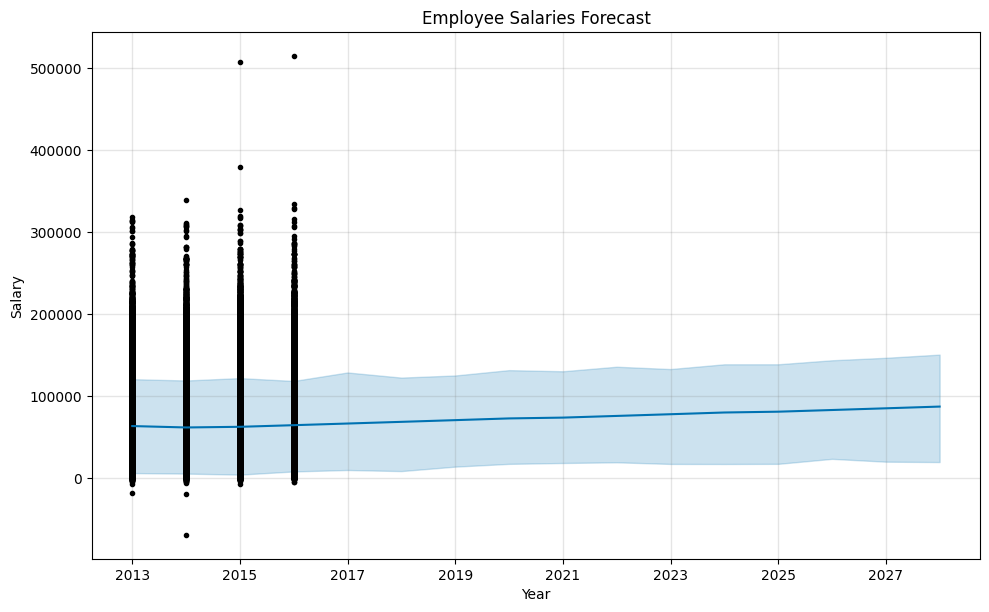

In [15]:
# Step 7: Plot the forecast
fig = model.plot(forecast)
plt.title('Employee Salaries Forecast')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()